<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## 1. Understand K-means

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

We randomly generate some groups of data in 2-d space

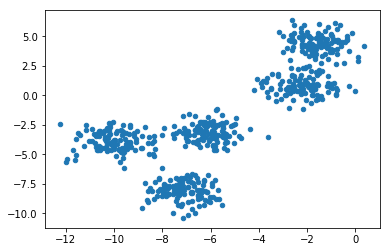

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=20);

Then we run the K-means algorithm, find out the centroid of each group of data, and make predictions.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
kmeans.cluster_centers_

array([[-6.11398201, -3.11924685],
       [-1.55383662,  4.44779912],
       [-9.98787166, -3.88556349],
       [-7.12477649, -8.09803975],
       [-2.17812827,  0.7903456 ]])

Finally we plot the data with predicted values in differnt colors, and show centroid in red circle.

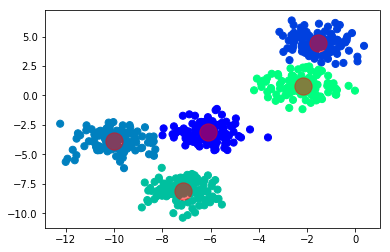

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

## 2. K-means for image compression

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [0]:
from sklearn.datasets import load_sample_image
image = load_sample_image("china.jpg")


In [7]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print( data.shape )
reduced_colors = 16

(273280, 3)


In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(reduced_colors)
kmeans.fit(data)

centers = kmeans.cluster_centers_
reduced_color_image = centers[kmeans.predict(data)]


In [9]:
kmeans.cluster_centers_

array([[0.17298948, 0.16236858, 0.12301947],
       [0.90169896, 0.90600379, 0.91713312],
       [0.52271066, 0.48637746, 0.31516377],
       [0.60641224, 0.64434534, 0.6289536 ],
       [0.06836126, 0.06086331, 0.0367668 ],
       [0.76892729, 0.83110182, 0.90290668],
       [0.88638344, 0.6666918 , 0.49763072],
       [0.44344042, 0.37410125, 0.19148181],
       [0.94455508, 0.96244042, 0.98992285],
       [0.2816934 , 0.28193765, 0.20520276],
       [0.75287946, 0.48659817, 0.35248805],
       [0.72627533, 0.76374663, 0.75626492],
       [0.37298462, 0.38591528, 0.34256527],
       [0.36140116, 0.17963406, 0.11067278],
       [0.51572343, 0.53478827, 0.48092412],
       [0.83630338, 0.90920841, 0.9857586 ]])

In [0]:
def plot_image_vs_reduced(image, reduced_image):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(reduced_image)
    ax[1].set_title('Reduced-color Image', size=16);
    plt.show()

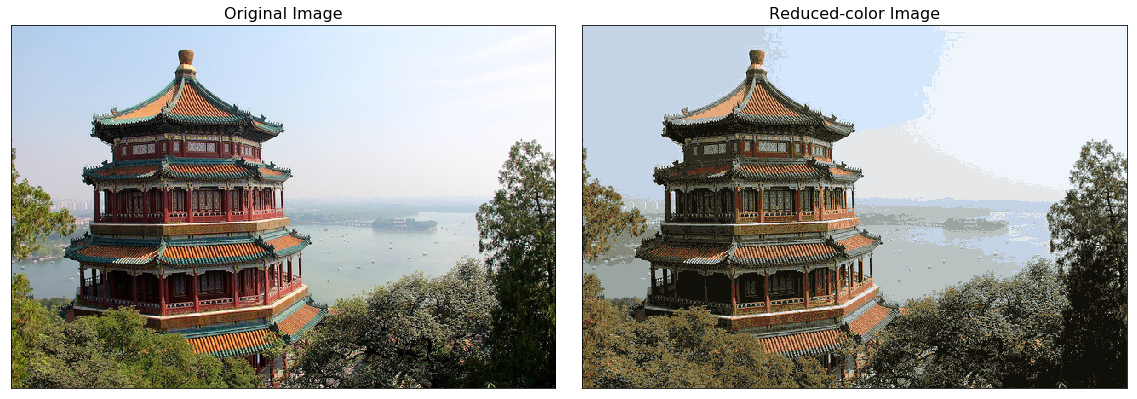

In [11]:
image_recolored = reduced_color_image.reshape(image.shape)
plot_image_vs_reduced( image, image_recolored )

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def plot_colors_in_colorspace( image, reduced_colors ):

    r = []
    g = []
    b = []

    for line in image:
      for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
    fig, ax = plt.subplots(1, figsize=(12, 10))

    ax = Axes3D(fig)
    ax.scatter(r[::16], g[::16], b[::16], cmap='viridis', lw=0, s=20, alpha=0.3, label='origian color')
    ax.scatter(reduced_colors[:, 0], reduced_colors[:, 1], reduced_colors[:, 2], c='r', lw=10, s=300, alpha=0.9, label='reduced color')
    ax.set_xlabel('R color', fontsize=20)
    ax.set_ylabel('G color', fontsize=20)
    ax.set_zlabel('B color', fontsize=20)
    ax.set_title('Original color space: 16,777,216 colors', fontsize=24)
    ax.legend(loc='lower left', fontsize=16)

    plt.show()        

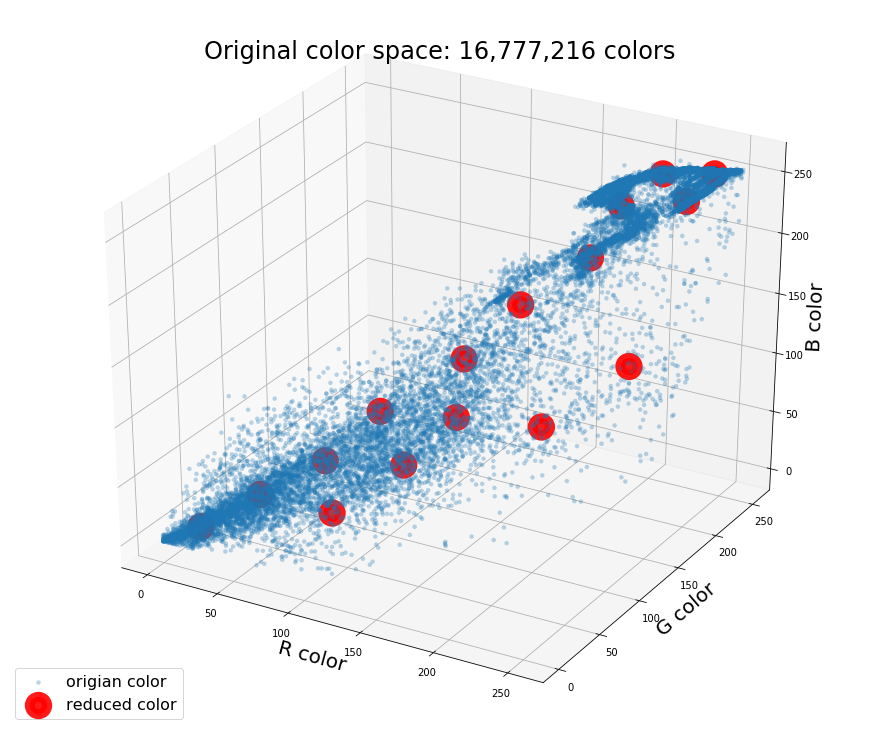

In [13]:
plot_colors_in_colorspace( image = image, reduced_colors = centers * 255 )


## 3. k-means for digits clustering

Here we will use k-means to identify similar digits of MNIST without using the original label .

In [14]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


The small green number at the top-left is the ground truth label of the image.


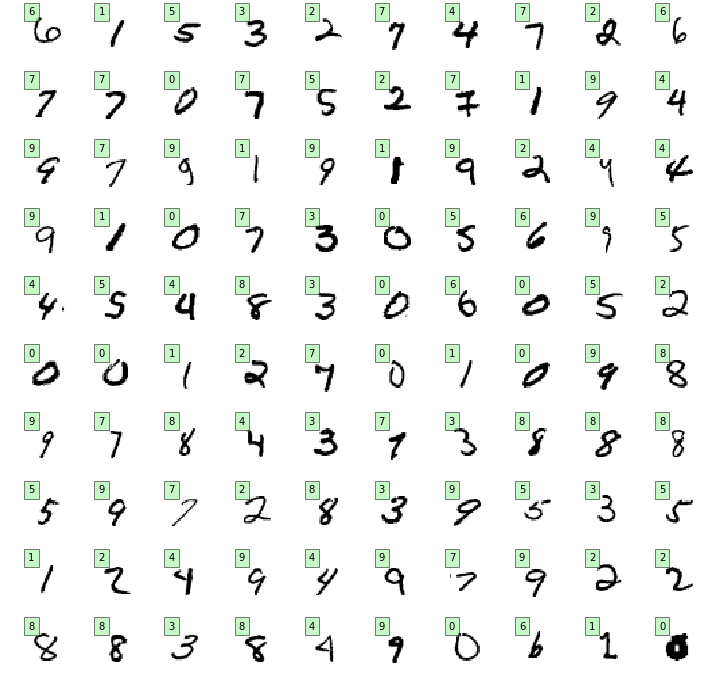

In [15]:
def plot_random_100_images(data, label, prediction = None, label_encoded = False, prediction_provided = False):
  
    print( "The small green number at the top-left is the ground truth label of the image." )
    if prediction_provided == True:
        print( "The small pink number beside it is the predicted value of the image." )
    
    _, axarr = plt.subplots(10,10,figsize=(12,12))
    plt.subplots_adjust(wspace=0.8, hspace=0.8)

    for i in range(10):
        for j in range(10):
           index = np.random.randint(data.shape[0])
           if label_encoded == False:
              groundtruth_lable = str(label.flatten()[index])
              if prediction_provided == True:
                  predicted_lable = str(prediction.flatten()[index])
           else:
              groundtruth_lable = str(np.argmax(label[index]))
              if prediction_provided == True:
                  predicted_lable = str(np.argmax(prediction[index]))
                                        
           axarr[i,j].imshow(data[index].reshape((28,28), order = 'F'), cmap="binary", interpolation="nearest")          
           axarr[i,j].axis('off')  
           axarr[i,j].text(0.5, 0.5, groundtruth_lable,bbox=dict(facecolor='lightgreen', alpha=0.5))
          
           if prediction_provided == True:
              axarr[i,j].text(10.5, 0.5, predicted_lable,bbox=dict(facecolor='pink', alpha=0.5))

              
plot_random_100_images(X_train, y_train )

In [16]:
X = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
y = y_train

#X = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
#y = y_test
print( X.shape)

(60000, 784)


In [17]:
kmeans = MiniBatchKMeans(10)
kmeans.fit(X)

centers = kmeans.cluster_centers_
y_pred = kmeans.predict(X)

print( "centers:", centers.shape )
print( "y_pred: ", y_pred.shape )

centers: (10, 784)
y_pred:  (60000,)


The result of K-means is 10 clusters in 784 dimensions, which is 28x28. Let's see what these cluster centers look like:

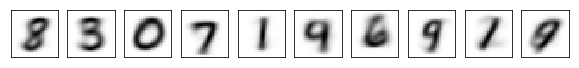

In [18]:
fig, ax = plt.subplots(1, 10, figsize=(10, 2))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [0]:
from scipy.stats import mode

labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acs = accuracy_score(y, labels)
mat = confusion_matrix(y, labels)

print( "Accuracy: ", acs )
print( "Confusion Matrix: \n", mat )

Accuracy:  0.5562666666666667
Confusion Matrix: 
 [[4594    9    0  210  625    0  269    3  143   70]
 [   0 6673    0    9    4    0   12    5    6   33]
 [  79 1442    0  331  723    0 2532   83  708   60]
 [  31  430    0 3940  207    0  120   32 1116  255]
 [   3  185    0    0 3813    0  113    5    4 1719]
 [  72  447    0 1924 1224    0  127    6  570 1051]
 [  65  480    0   45  261    0 4967    0   38   62]
 [  12  503    0    5 1416    0   10 3829   23  467]
 [  25  537    0 1200  617    0   46   15 2907  504]
 [  36  130    0   87 2756    0   13  260   14 2653]]
